<a href="https://colab.research.google.com/github/marcelaksouza/OCR/blob/YOLOv3_TF2/YOLOv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 12765, done.
remote: Total 12765 (delta 0), reused 0 (delta 0), pack-reused 12765
Receiving objects: 100% (12765/12765), 11.69 MiB | 11.44 MiB/s, done.
Resolving deltas: 100% (8693/8693), done.


In [0]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/darknet


In [0]:
# make darknet (build)
!make

In [0]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

In [0]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [0]:
# run darknet detection person dog and horse image from internal data set
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

In [0]:
# show image using our helper function
imShow('predictions.jpg')

In [0]:
# Dog bicycle and car image from internal dataset
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg
imShow('predictions.jpg')

In [0]:
# This stops 'Run all' at this cell by causing an error
assert False

Load image from google drive 

In [0]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 Book				        Livros
 Business			        MAD_Code
'California things.gsheet'	       'Marcela and Padraig Projects'
'Colab Notebooks'		        Musicas
 College			       'my time'
'Despesas e pagamentos do mes.gsheet'  'Personal Growth'
 Documentos			        Professional
'Food Diary.gsheet'		        Work
 fotos


In [0]:
# nao esta funcionando
# tentando criar um sybolic link pra nossa pasta 
#!ln -s /content/gdrive/My Drive/MAD Code/Colab Notebooks\ Drive/ /mycolab
#!ls /mycolab

In [0]:
# esse funciona
!ls "/mydrive/MAD_Code/Colab Notebooks/images/"

aug_0_2181.jpg	aug_0_4720.jpg	aug_0_5554.jpg	detection1.jpg
aug_0_3044.jpg	aug_0_5201.jpg	aug_0_780.jpg	umbrella.jpg
aug_0_367.jpg	aug_0_554.jpg	aug_0_8322.jpg


In [0]:
# loading the model with a image from the google drive 
%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights "/mydrive/MAD_Code/Colab Notebooks/images/umbrella.jpg"

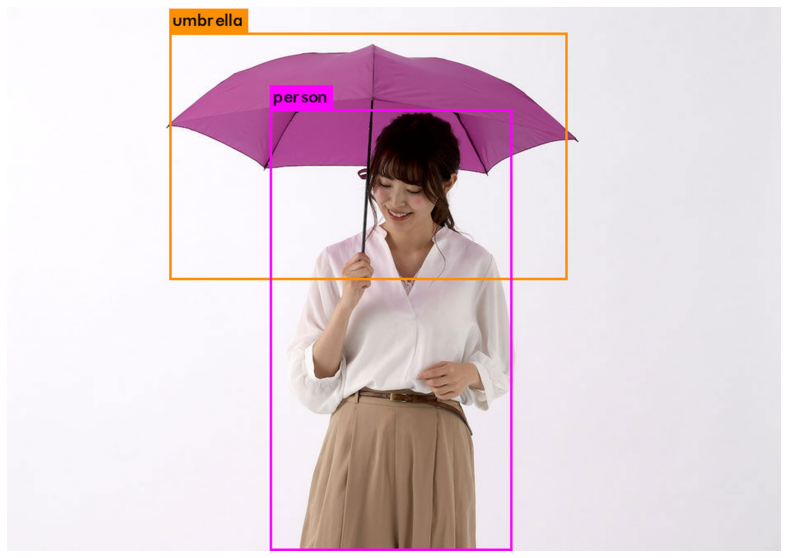

In [0]:
imShow('predictions.jpg')

In [0]:
#save detection to drive folder
!cp predictions.jpg "/mydrive/MAD_Code/Colab Notebooks/images/detection1.jpg"

#Keras Data Augmentation

In [1]:
#set up data augmentation enviroment 

#mount google drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

#create symbolic link
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

# test if it works
!ls "/mydrive/MAD_Code/Colab Notebooks/images/"

/
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
 Book				        Livros
 Business			        MAD_Code
'California things.gsheet'	       'Marcela and Padraig Projects'
'Colab Notebooks'		        Musicas
 College			       'my time'
'Despesas e pagamentos do mes.gsheet'  'Personal Growth'
 Documentos			        Professional
'Food Diary.gsheet'		        Work
 fotos
sucess_0_248955.jpg   sucess_0_8321370.jpg  sucess_1_5732547.jpg
sucess_0_3864472.jpg  sucess_0_9654060.jpg  sucess_1_5974624.jpg
sucess_0_5189490.

In [0]:
!pip install -q keras

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


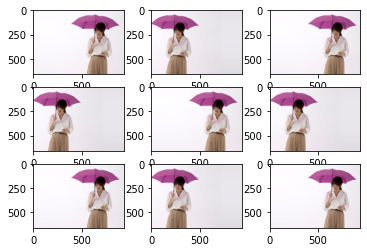

In [0]:
# from example 
# https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/
import keras
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator


# load the image
img = load_img("/mydrive/MAD_Code/Colab Notebooks/images/umbrella.jpg")

# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [7]:
#test to read from the directory and use the augmentation
import keras
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# load the image
dir = "/mydrive/MAD_Code/Colab Notebooks/images/"

# create image data augmentation generator
datagen = ImageDataGenerator(
rotation_range=90,
brightness_range=[0.2,1.0],
vertical_flip=True)

# prepare iterator
it = datagen.flow_from_directory(dir, batch_size=1, save_to_dir=dir, save_format='jpg', save_prefix='sucess')
# generate samples and plot
for i in range(10):
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')



Found 10 images belonging to 1 classes.


In [0]:
dir = "/mydrive/MAD_Code/Colab Notebooks/images/"

# Davi section

In [0]:
#test to read from the directory and use the augmentation
import keras
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot



for i in range(1,11):
  samples = expand_dims(data, 0)
  datagen = ImageDataGenerator(rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  vertical_flip=True,
  fill_mode='nearest')
  dir = "/content/drive/My Drive/tanita/"+str(1)+".jpg"
  img = load_img(dir)
  save_here =  "/content/drive/My Drive/tanitaResult"
  #datagen.fit(10,augment=True)

  it = datagen.flow(samples, batch_size=10)
  for i in range(9):
    #pyplot.subplot(320+0+i)
    batch = it.next()
    image = batch[0].astype('uint8')
    save_img(save_here+"/ziriguidumito"+str(i)+".jpg",image)
    pyplot.imshow(image)
    pyplot.show()
    pyplot.imsave(save_here+"/opaio"+str(i)+".jpg",image)

In [0]:
#test to read from the directory and use the augmentation
import keras
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# load the image
dir = "/mydrive/MAD_Code/Colab Notebooks/images/"

# create image data augmentation generator
datagen = ImageDataGenerator(
rotation_range=90,
brightness_range=[0.2,1.0],
vertical_flip=True)

# flow_from_directory gets a folder and itinerate. It also saves into the given directory  
it = datagen.flow_from_directory(dir, batch_size=1, save_to_dir=dir, save_format='jpg', save_prefix='tanita')
# change the range for more images
for i in range(10):
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')